# Homework for Week 1

## question1 ..

## question2

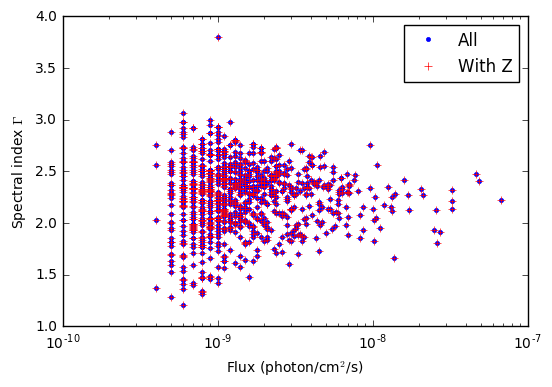

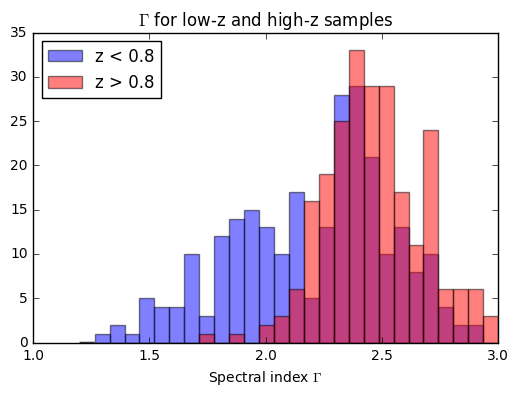

In [1]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np

#read the data,also can use np.loadtxt()
dat = ascii.read('c:/users/a/desktop/Galaxy/fermi_agn.dat')
redshift = dat['redshift']
flux = dat['photon_flux']
gamma = dat['spectral_index']
#print(flux)
#with_z = (redshift != -999)
mask = (dat['redshift'] != -999)

plt.figure(1)
plt.subplot(1,1,1)
plt.semilogx(flux,gamma,'b.',label='All')
plt.semilogx(flux,gamma,'r+',label='With Z')
plt.legend(numpoints=1)
plt.xlabel('Flux (photon/cm$^2$/s)')   
plt.ylabel('Spectral index $\Gamma$')
plt.show()
#picture can be saved in the show-windows.

lowz = mask & (redshift < 0.8)
highz = mask & (redshift >= 0.8)
plt.figure(2)
n_bin = 28   

plt.hist(gamma[lowz], n_bin, color='b', range = (1.2,3.0), alpha=0.5, label='z < 0.8')
plt.hist(gamma[highz], n_bin, color='r', range = (1.2,3.0), alpha=0.5, label='z > 0.8')
plt.xlabel('Spectral index $\Gamma$')
plt.title('$\Gamma$ for low-z and high-z samples')
plt.legend(loc='upper left')
plt.show()
#picture can be saved in the show-windows.

#ascii.write(dat[with_z], 'fermi_agn_with_z.dat')

Scale =  11.139 +/- 0.726
Offset = 3.125 +/- 0.097
Sigma =  2.078 +/- 0.136


d:\python34\lib\site-packages\matplotlib\axes\_axes.py:2748: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


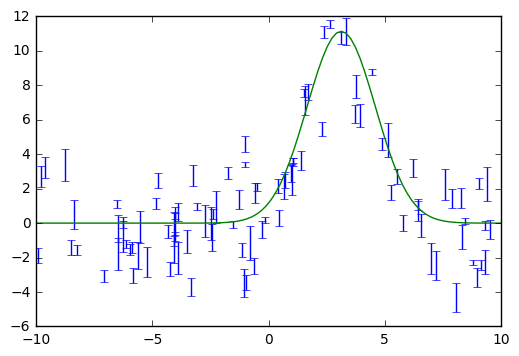

In [53]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

#simulate data
n=100
x = np.random.uniform(-10.0, 10.0, n)
y = np.exp(-(x - 3.0)**2 / 4) * 10. + np.random.normal(0.0, 2.0, n)
e = np.random.uniform(0.1, 1.0, n)

# Fit
popt, pcov = curve_fit(gaussian, x, y, sigma=e)

# Print results
print("Scale =  %.3f +/- %.3f" % (popt[0], np.sqrt(pcov[0, 0])))
print("Offset = %.3f +/- %.3f" % (popt[1], np.sqrt(pcov[1, 1])))
print("Sigma =  %.3f +/- %.3f" % (popt[2], np.sqrt(pcov[2, 2])))

# Plot data
plt.errorbar(x, y, yerr=e, linewidth=1, color='k', fmt=None)

# Plot model
xm = np.linspace(-10.0, 10.0, 100)  # 100 evenly spaced points
plt.plot(xm, gaussian(xm, popt[0], popt[1], popt[2]))

plt.show()
# Save figure
#plt.savefig('fit.png')

In [56]:
from astropy.io import fits
from scipy.ndimage import gaussian_filter
import numpy as np

# simulate data
nx, ny = 512, 512
image = np.zeros((ny, nx))
n = 10000
r = np.random.random(n) * nx
theta = np.random.uniform(0., 2. * np.pi, n)
f = np.random.random(n) ** 2
x = nx / 2 + r * np.cos(theta)
y = ny / 2 + r * np.sin(theta)

for i in range(n):
    if x[i] >= 0 and x[i] < nx and y[i] >= 0 and y[i] < ny:
        image[y[i], x[i]] += f[i]

# Convolve with a gaussian
image = gaussian_filter(image, 1)
#that's just what matters.
# Add noise
image += np.random.normal(3., 0.01, image.shape)

# Write out to FITS image
fits.writeto('cluster.fits', image, clobber=True)
#create a fits image automatically HUD=1

d:\python34\lib\site-packages\ipykernel_launcher.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


## question 3

In [59]:
from astropy.io import fits

#get the single band image array form fits data
hdu_u = fits.open('c:/users/a/desktop/Galaxy/M101/frame-u-003712-3-0187.fits')
hdu_g = fits.open('c:/users/a/desktop/Galaxy/M101/frame-g-003712-3-0187.fits')
hdu_r = fits.open('c:/users/a/desktop/Galaxy/M101/frame-r-003712-3-0187.fits')

#make a color image by u-g-r band data and save it 
image_array = hdu_u[0].data+hdu_g[0].data+hdu_r[0].data
Prihead = fits.Header()
Prihead['Name'] = ('M101')
hdu = fits.PrimaryHDU(image_array,header=Prihead)
hdu.writeto('c:/users/a/desktop/Galaxy/M101/M101-image4ugr.fits')

## question 4

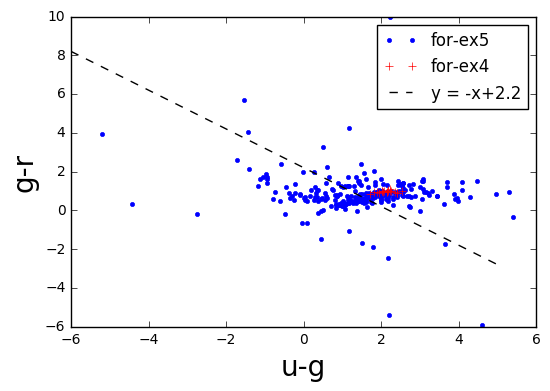

In [2]:
#for exercise 4,5,6
from astropy.io import fits
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt


#read the data for exercise4&5
sdu = fits.open('c:/users/a/desktop/Galaxy/Abell2255.fits')
swu = ascii.read('c:/users/a/desktop/Galaxy/question4.csv')

u_g = sdu[1].data['u']-sdu[1].data['g']
g_r = sdu[1].data['g']-sdu[1].data['r']

u_g0 = swu['u'] - swu['g']
g_r0 = swu['g'] - swu['r']

#for the line y=-x+2.2
x = np.arange(-6.0,6.0,1)
y = -x + 2.2

plt.subplot(1,1,1)
plt.plot(u_g,g_r,'b.',label='for-ex5')
plt.plot(u_g0,g_r0,'r+',label='for-ex4')
plt.plot(x,y,'k--',label='y = -x+2.2')
plt.xlabel('u-g',size=20)
plt.ylabel('g-r',size=20)
plt.legend()
plt.show()